In [ ]:
cost function을 통해서 제대로 함수를 만들었는지 확인
예측값 - 실제값 = error, cost
Cost Function = (실제값-예측값)^2/N -> MSE(Mean Squared Error)

Y/N - 분류모델
연속 숫자 - 회귀,예측 

열 column 특징 속성 feature
행 row 예제 example 데이터
열 중에 하나를 선택하여 정답 레이블로 사용함
7:3 8:2 로 훈련:Test 설정

epochs 학습횟수

confusion matix 오차 행렬
분류 모델에서 성능 평가할 때 사용
True Positive(TP): True를 True로 예측
True Negative(TN): False를 False로 예측
False Positive(FP): False를 True로 예측
False Negative(FN): True를 False로 예측
T로 시작하면 맞힘, F로 시작하면 틀림

성능지표
학습이 끝난 후 모델을 평가하는 용도로 사용
정밀도 Precision
- 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
- 날씨 예측 모델이 맑다로 예측했는데, 실제 날씨가 맑았는지 나타낸 지표
- Precision = TP / (TP+FP)
재현율 Recall - 암환자 판단에서 사용
- 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
- 실제 날씨가 맑은 날 중에서 모델이 맑다고 예측한 비율을 나타낸 지표
- Recall = TP / (TP+FN) -> FN이라면 실제로는 P인 거니까
정확도 Accuracy
- 가장 직관적으로 모델의 성능을 나타낼 수 있는 평가 지표
- 한 달에 맑은 날이 28일이고 비가 오는 날이 2일인 경우, 비가 오는 것을 예측하는 성능은 매우 낮을 수밖에 없으므로 이를 보완할 지표 필요
- Accuracy = (TP+TN) / (TP+FN+FP+TN) -> 모든 오차행렬 중에 정답인 값만
F1 점수 F1-score
- 정밀도와 재현율의 평균으로 구함


Scikit-learn에 머신 러닝 모델 다 있음
회귀 - Linear Regression
분류 - Logistic Regression
회귀,분류 - Decision Tree, Random Forest, K-Nearest Neighbor


Linear Regression 
내일을 예측 (직선)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) 훈련하여 가중치 찾음
pred = model.predict(X_test) 테스트함

Logistic Regression
이진 분류 규칙은 0과 1의 두 클래스를 갖는 것, 일반 선형 회귀 모델을 이진분류에 사용하기 어려움
시그모이드, 로지스틱 함수를 사용하여 0과 1 사이의 값이 나오고 그를 통해 이진분류함
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train) 
pred = model.predict(X_test)

K-Nearest Neighbor
새로운 데이터가 주어졌을 때 기존 데이터 가운데 가장 가까운 k개 이웃의 정보로 새로운 데이터를 예측하는 방법
알고리즘 간단하나 고차원이나 복잡한 것에는 놉
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) 이웃을 3개로 정함 하이퍼파라미터 부분 좋은 성능 위해서는 넣어보면서 바꾸기
knn.fit(X_train, y_train) 훈련 X 테스트 y
pred = knn.predict(X_test)

Decision Tree
분류와 회귀 작업이 가능한 다재다능한 머신러닝 알고리즘, 조건을 기준으로 True, False로 나뉘면서 트리를 만들어 판단
복잡한 데이터셋도 학습할 수 있으며 강력한 머신러닝 알고리즘인 랜덤 포레스트(앙상블)의 기본 구성 요소
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2) 트리를 최대 2단계까지만 깊이 가도록
model.fit(X_train, y_train) 
pred = model.predict(X_test)

Random Forest 자주 사용함!
일련의 예측기(분류,회귀모델)로부터 예측을 수집하면 가장 좋은 모델 하나보다 더 좋은 예측을 얻을 수 있음
일련의 예측기 - 앙상블 (여러 개 사용)
결정 트리의 앙상블 - 랜덤 포레스트
훈련 셋으로부터 무작위의 각기 다른 서브셋을 만들어 일련의 결정 트리 분류기를 훈련한 후 다수결로 나온 것 중 정답을 정함
from sklearn.ensemble import RandomForestClassifier
model = RandonForestClassifier(n_estimators=50) # 50개의 DecisionTree를 만들겠다
model.fit(X_train, y_train)
pred = model.predict(X_test)


Ensemble 
여러 개의 분류기를 생성하고, 그 예측을 결합함으로써 보다 정확한 예측을 도출
약한 모델 여러 개를 조합하여 더 정확한 예측 방식
적절한 Hyperparameter 튜닝이 중요
1) Boosting (직렬로 여러개 사용, 비교 - bagging 방식을 사용하는 대표 모델은 RandomForest 병렬로)
이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식
대표 모델: XGBoost, LightGBM 중요!!
순차적인 학습을 하며 weight를 부여해서 오차를 보완하므로 학습 시간이 길 수 있음
2) Stacking (앙상블의 끝판왕)
여러 개 모델이 예측한 결과 데이터를 기반으로 final_estimator 모델로 종합하여 예측 수행
성능은 향상될 수 있으나 과대적합을 유발할 수 있음
3) Weighted Blending
각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산
가중치의 합은 1.0이 되도록 함

[Random Forest, XGBoost, LightGBM은 대표적. 성능 좋아서 많이 사용함]
1) XGBoost
!pip install xgboost (!를 붙이면 리눅스 명령어)
from xgboost import XGBClassifier
model = XGBClasifier(n_estimators=50) 트리 50개 사용
model.fit(X_train, y_train) 참고서로 학습
pred = model.predict(X_test) 시험으로 테스트
2) LightGBM
!pip install lightgbm (!를 붙이면 리눅스 명령어)
from xgboost import LGBMClassifier
model = LGBMClasifier(n_estimators=50) 트리 50개 사용
model.fit(X_train, y_train) 참고서로 학습
pred = model.predict(X_test) 시험으로 테스트


In [ ]:
[실습] Python을 활용한 AI 모델링 - 머신러닝 파트
이번시간에는 Python을 활용한 AI 모델링에서 머신러닝에 대해 실습해 보겠습니다.

머신러닝 모델에는 아래와 같이 모델들이 있습니다.

단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree

앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending

솔직히, 머신러닝이 딥러닝보다 코딩하기 쉽습니다. 4줄 템플릿에 맞쳐 코딩하면 되기 때문입니다.

그래도, 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다.

이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

학습목차
1.실습을 위한 KT AIDU 환경변수 설정
2.머신러닝 모델 프로세스
데이터 가져오기
데이터 전처리
Train, Test 데이터셋 분할
데이터 정규화
단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending

In [ ]:
1. 실습을 위한 KT AIDU 환경변수 설정

In [1]:
# 코드실행시 경고 메시지 무시

import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
AIDU 라이브러리 임포트

In [ ]:
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm

aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)

In [ ]:
AIDU 디렉토리 환경변수
data 경로: aidu_framework.config.data_dir

In [ ]:
# aidu_framework.config.data_dir 내용 확인
aidu_framework.config.data_dir

In [ ]:
2. 머신러닝 모델 프로세스
① 라이브러리 임포트(import)
② 데이터 가져오기(Loading the data)
③ 탐색적 데이터 분석(Exploratory Data Analysis)
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 더미특성 생성, 특성 추출 (feature engineering) 등
⑤ Train, Test 데이터셋 분할
⑥ 데이터 정규화(Normalizing the Data)
⑦ 모델 개발(Creating the Model)
⑧ 모델 성능 평가

In [ ]:
① 라이브러리 임포트
필요 라이브러리 임포트

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
② 데이터 로드
cust_data.csv 파일 컬럼명
고객등급(cust_class), 성별(sex_type), 나이(age), 사용서비스수(efct_svc_count), 서비스중지여부 (dt_stop_yn), 미납여부(npay_yn)
3개월 평균 요금(r3m_avg_bill_amt), A서비스 3개월 평균요금(r3m_A_avg_arpu_amt), B서비스 3개월 평균요금(r3m_B_avg_arpu_amt), 해지여부(termination_yn)

In [4]:
# cust_data.csv 파일 읽기
df = pd.read_csv('cust_data.csv')

In [ ]:
③ 데이터 분석

In [5]:
# 12컬럼, 7814 라인
df.info() 
# row는 rangeindex 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        7814 non-null   object 
 1   sex          7814 non-null   object 
 2   age          7814 non-null   int64  
 3   service      7814 non-null   int64  
 4   stop         7814 non-null   object 
 5   npay         7814 non-null   object 
 6   avg_bill     7814 non-null   float64
 7   A_bill       7814 non-null   float64
 8   B_bill       7814 non-null   float64
 9   termination  7814 non-null   object 
 10  by_age       7814 non-null   int64  
 11  bill_rating  7814 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 732.7+ KB


In [6]:
df.tail()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,by_age,bill_rating
7809,C,M,76,1,N,N,1860.0000,1716.000000,0.0000,N,75,low
7810,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,N,15,low
7811,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,N,10,midhigh
7812,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,Y,40,low
7813,C,F,59,1,N,N,2436.9000,365.535000,1839.9000,N,55,low


<Axes: >

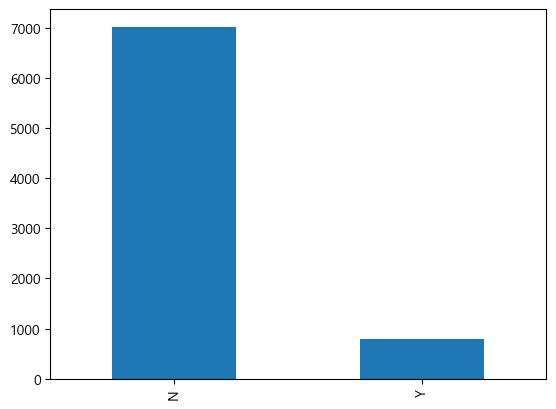

In [7]:
# termination 레이블 불균형 (정답 Y 레이블) 
df['termination'].value_counts().plot(kind='bar')

In [ ]:
④ 데이터 전처리
Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding하여 컴퓨터가 이해하도록

In [8]:
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']

In [9]:
df1 = pd.get_dummies(data=df, columns=cal_cols, drop_first=True) #원핫인코딩 실행하는 함수

In [10]:
# 19컬럼, 7814 라인
df1.info()
# 하나의 컬럼이 여러가지 컬럼으로 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7814 non-null   int64  
 1   service              7814 non-null   int64  
 2   avg_bill             7814 non-null   float64
 3   A_bill               7814 non-null   float64
 4   B_bill               7814 non-null   float64
 5   by_age               7814 non-null   int64  
 6   class_D              7814 non-null   uint8  
 7   class_E              7814 non-null   uint8  
 8   class_F              7814 non-null   uint8  
 9   class_G              7814 non-null   uint8  
 10  class_H              7814 non-null   uint8  
 11  sex_M                7814 non-null   uint8  
 12  stop_Y               7814 non-null   uint8  
 13  npay_Y               7814 non-null   uint8  
 14  termination_Y        7814 non-null   uint8  
 15  bill_rating_low      7814 non-null   u

In [ ]:
⑤ Train, Test 데이터셋 분할

In [11]:
from sklearn.model_selection import train_test_split #자주씀

In [12]:
X = df1.drop('termination_Y', axis=1).values # 나머지 레이블
y = df1['termination_Y'].values # 예측 정답 확인할 레이블

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, #test30프로
                                                    stratify=y, #y값의 비율 그대로 test, train 나눠라
                                                    random_state=42)

In [14]:
X_train.shape # 70프로의 값만 가짐

(5469, 18)

In [15]:
y_train.shape # Y값만 가지고 있음

(5469,)

In [ ]:
⑥ 데이터 정규화/스케일링(Normalizing/Scaling)
나이 컬럼, 연봉 컬럼 간의 데이터 값의 차이가 큼. 그래서 비슷한 범위가 되도록 바꾸기. 꼭 해주는 게 좋음. 성능 높아짐

In [16]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

,age,service,avg_bill,A_bill,B_bill,by_age,class_D,class_E,class_F,class_G,class_H,sex_M,stop_Y,npay_Y,termination_Y,bill_rating_low,bill_rating_lowmid,bill_rating_mid,bill_rating_midhigh
7809,76,1,1860.0000,1716.000000,0.0000,75,0,0,0,0,0,1,0,0,0,1,0,0,0
7810,15,1,1296.0999,194.414985,643.1001,15,0,0,0,0,0,0,0,1,0,1,0,0,0
7811,12,1,13799.6666,2069.949990,10605.9266,10,0,0,0,1,0,1,0,0,0,0,0,0,1
7812,40,0,3140.0000,942.000000,1884.0000,40,0,0,0,0,0,0,0,0,1,1,0,0,0
7813,59,1,2436.9000,365.535000,1839.9000,55,0,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
from sklearn.preprocessing import MinMaxScaler # 0~1 사이의 값으로 스케일링 해줌

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # X값을 넣어줌
X_test = scaler.transform(X_test) # X값을 넣어줌

In [19]:
X_train[:2], y_train[:2]

(array([[0.38      , 0.33333333, 0.4295439 , 0.06384702, 0.41944434,
         0.4       , 0.        , 0.        , 0.        , 0.        ,
         1.        , 1.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 1.        ],
        [0.58      , 0.11111111, 0.20111297, 0.38498933, 0.        ,
         0.6       , 1.        , 0.        , 0.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        ]]),
 array([0, 0], dtype=uint8))

In [ ]:
모델 입력갯수, 출력갯수 확인 여전함 내부 값이 바뀐 것

In [20]:
X_train.shape

(5469, 18)

In [21]:
y_train.shape

(5469,)

In [ ]:
⑦ 모델 개발
모델별 바차트 그려주고 성능 확인을 위한 함수 정의

In [22]:
# 이해 보다는 사용할 때 가져다가 쓰면 됨
# 모델별로 Accuracy 점수 저장
# 모델 Accuracy 점수 순서대로 바차트를 그려 모델별로 성능 확인 가능

from sklearn.metrics import accuracy_score

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# 모델명, 예측값, 실제값을 주면 위의 plot_predictions 함수 호출하여 Scatter 그래프 그리며
# 모델별 MSE값을 Bar chart로 그려줌
def accuracy_eval(name_, pred, actual):
    global predictions
    global colors

    plt.figure(figsize=(12, 9))

    acc = accuracy_score(actual, pred)
    my_predictions[name_] = acc * 100

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'accuracy'])
    print(df)
   
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['accuracy'])
    
    for i, v in enumerate(df['accuracy']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('accuracy', fontsize=18)
    plt.xlim(0, 100)
    
    plt.show()

In [ ]:
1) 로지스틱 회귀 (LogisticRegression, 분류)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report # 위의 성능 지표를 불러와서 사용

In [24]:
lg = LogisticRegression(C=1.0,max_iter=2000) # 하이퍼 파라미터
lg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [25]:
# 분류기 성능 평가(score)
lg.score(X_test, y_test) 
# 92프로의 성능이 나옴

0.929637526652452

In [ ]:
분류기 성능 평가 지표

In [26]:
lg_pred = lg.predict(X_test)

In [27]:
# 오차행렬
# TN  FP
# FN  TP

confusion_matrix(y_test, lg_pred) # 정답과 예측값을 주면 만들어줌

array([[2098,   11],
       [ 154,   82]], dtype=int64)

In [29]:
# 정확도 : 굉장히 높다
accuracy_score(y_test, lg_pred)  

0.929637526652452

In [30]:
# 정밀도
precision_score(y_test, lg_pred) 

0.8817204301075269

In [31]:
# 재현율 : 굉장히 낮다.
recall_score(y_test, lg_pred)  

0.3474576271186441

In [32]:
# 정밀도 + 재현율
f1_score(y_test, lg_pred) 

0.4984802431610942

In [33]:
print(classification_report(y_test, lg_pred)) # 위의 성능지표를 모두 합한 것
# 0번 클래스, 1번 클래스에 대해 각각 나옴

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2109
           1       0.88      0.35      0.50       236

    accuracy                           0.93      2345
   macro avg       0.91      0.67      0.73      2345
weighted avg       0.93      0.93      0.92      2345



                model   accuracy
0  LogisticRegression  92.963753


<Figure size 1200x900 with 0 Axes>

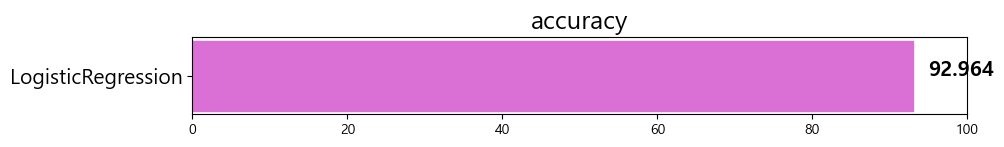

In [34]:
accuracy_eval('LogisticRegression', lg_pred, y_test)

In [ ]:
2) KNN (K-Nearest Neighbor)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
knn_pred = knn.predict(X_test)

                model   accuracy
0  K-Nearest Neighbor  94.712154
1  LogisticRegression  92.963753


<Figure size 1200x900 with 0 Axes>

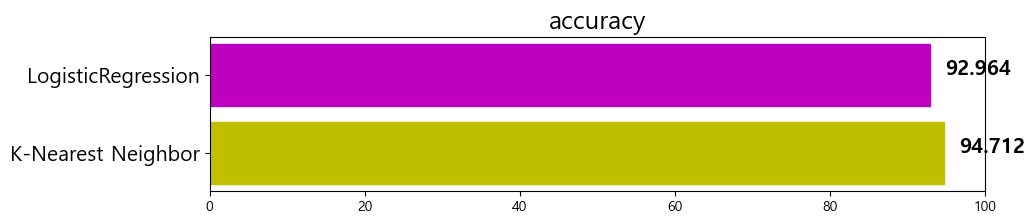

In [39]:
accuracy_eval('K-Nearest Neighbor', knn_pred, y_test)

In [ ]:
3) 결정트리(DecisionTree)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [42]:
dt_pred = dt.predict(X_test)

                model   accuracy
0        DecisionTree  97.313433
1  K-Nearest Neighbor  94.712154
2  LogisticRegression  92.963753


<Figure size 1200x900 with 0 Axes>

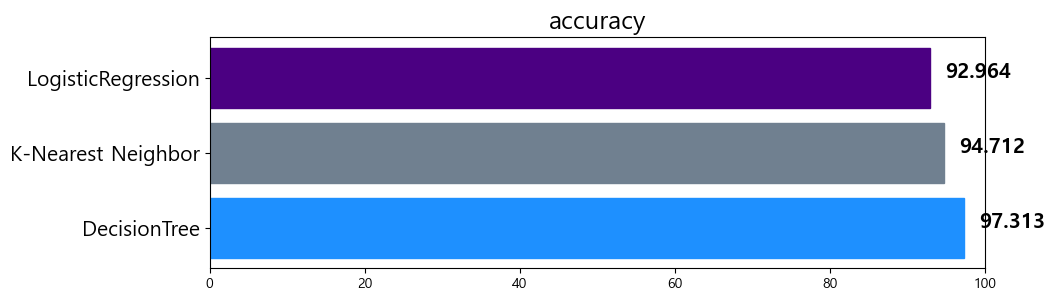

In [43]:
accuracy_eval('DecisionTree', dt_pred, y_test)

In [ ]:
앙상블 기법의 종류
배깅 (Bagging): 여러개의 DecisionTree 활용하고 샘플 중복 생성을 통해 결과 도출. RandomForest
부스팅 (Boosting): 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식. XGBoost, LGBM
스태킹 (Stacking): 여러 모델을 기반으로 예측된 결과를 통해 Final 학습기(meta 모델)이 다시 한번 예측
앙상블

4) 랜덤포레스트(RandomForest)
Bagging 대표적인 모델로써, 훈련셋트를 무작위로 각기 다른 서브셋으로 데이터셋을 만들고
여러개의 DecisonTree로 학습하고 다수결로 결정하는 모델

주요 Hyperparameter

random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
n_jobs: CPU 사용 갯수
max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용
n_estimators: 앙상블하는 트리의 갯수
max_features: 최대로 사용할 feature의 갯수. 과대적합 방지용
min_samples_split: 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators=3, random_state=42) # 결정트리 3개 사용
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [46]:
rfc_pred = rfc.predict(X_test)

                   model   accuracy
0  RandomForest Ensemble  97.611940
1           DecisionTree  97.313433
2     K-Nearest Neighbor  94.712154
3     LogisticRegression  92.963753


<Figure size 1200x900 with 0 Axes>

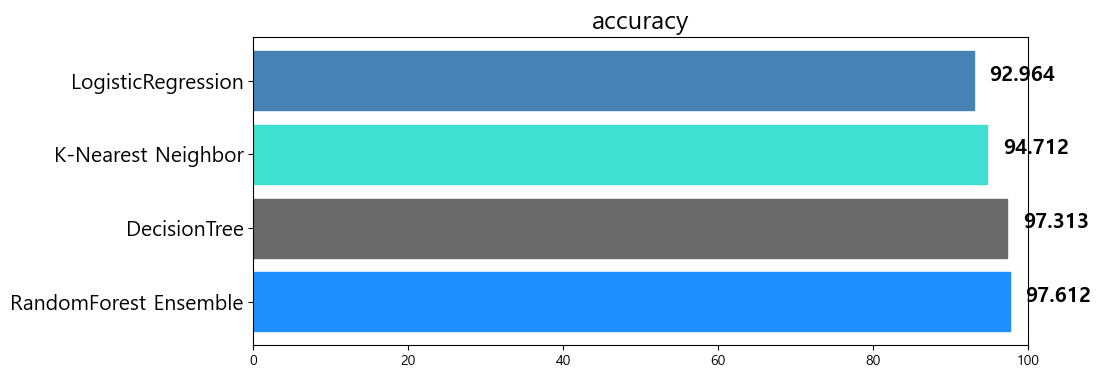

In [47]:
accuracy_eval('RandomForest Ensemble', rfc_pred, y_test)

In [ ]:
5) XGBoost
여러개의 DecisionTree를 결합하여 Strong Learner 만드는 Boosting 앙상블 기법
Kaggle 대회에서 자주 사용하는 모델이다.
주요 특징

scikit-learn 패키지가 아닙니다.
성능이 우수함
GBM보다는 빠르고 성능도 향상되었습니다.
여전히 학습시간이 매우 느리다
주요 Hyperparameter

random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
n_jobs: CPU 사용 갯수
learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
max_depth: 트리의 깊이. 과대적합 방지용. default=3.
subsample: 샘플 사용 비율. 과대적합 방지용. default=1.0
max_features: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0


In [48]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 5.0 MB/s eta 0:00:00


In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier(n_estimators=3, random_state=42)  # 10초 소요
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [51]:
xgb_pred = xgb.predict(X_test)

                   model   accuracy
0                XGBoost  97.825160
1  RandomForest Ensemble  97.611940
2           DecisionTree  97.313433
3     K-Nearest Neighbor  94.712154
4     LogisticRegression  92.963753


<Figure size 1200x900 with 0 Axes>

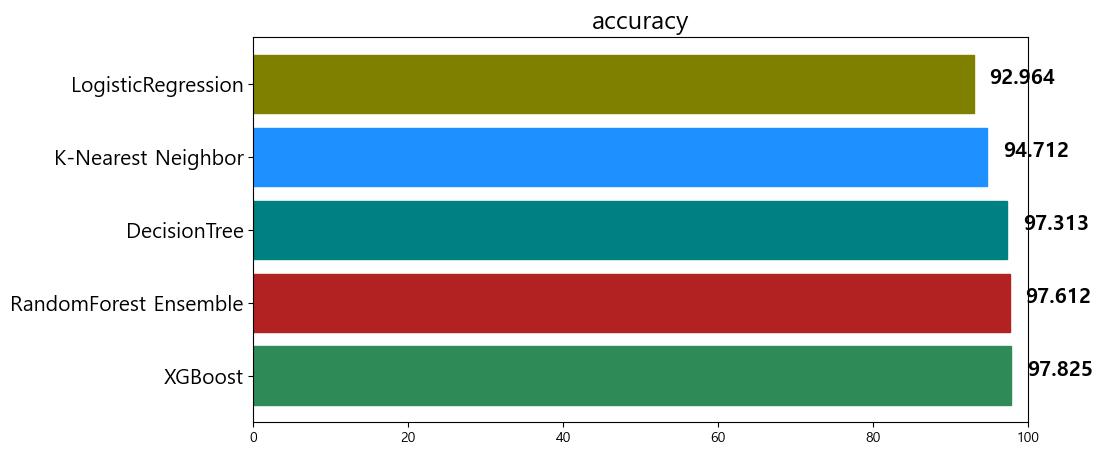

In [52]:
accuracy_eval('XGBoost', xgb_pred, y_test)

In [ ]:
6) Light GBM
XGBoost와 함께 주목받는 DecisionTree 알고리즘 기반의 Boosting 앙상블 기법
XGBoost에 비해 학습시간이 짧은 편이다.
주요 특징

scikit-learn 패키지가 아닙니다.
성능이 우수함
속도도 매우 빠릅니다.
주요 Hyperparameter

random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
n_jobs: CPU 사용 갯수
learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
max_depth: 트리의 깊이. 과대적합 방지용. default=3.
colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [53]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 4.9 MB/s eta 0:00:00


In [54]:
from lightgbm import LGBMClassifier

In [55]:
lgbm = LGBMClassifier(n_estimators=3, random_state=42)   # 생각보다 성능이 안 나옴. 성능을 높이기 위해 에스티메이터 높여주기 오래 걸림
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 549, number of negative: 4920
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 5469, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100384 -> initscore=-2.192965
[LightGBM] [Info] Start training from score -2.192965


LGBMClassifier(n_estimators=3, random_state=42)

In [56]:
lgbm_pred = lgbm.predict(X_test)

                   model   accuracy
0                XGBoost  97.825160
1  RandomForest Ensemble  97.611940
2           DecisionTree  97.313433
3     K-Nearest Neighbor  94.712154
4     LogisticRegression  92.963753
5                   LGBM  89.936034


<Figure size 1200x900 with 0 Axes>

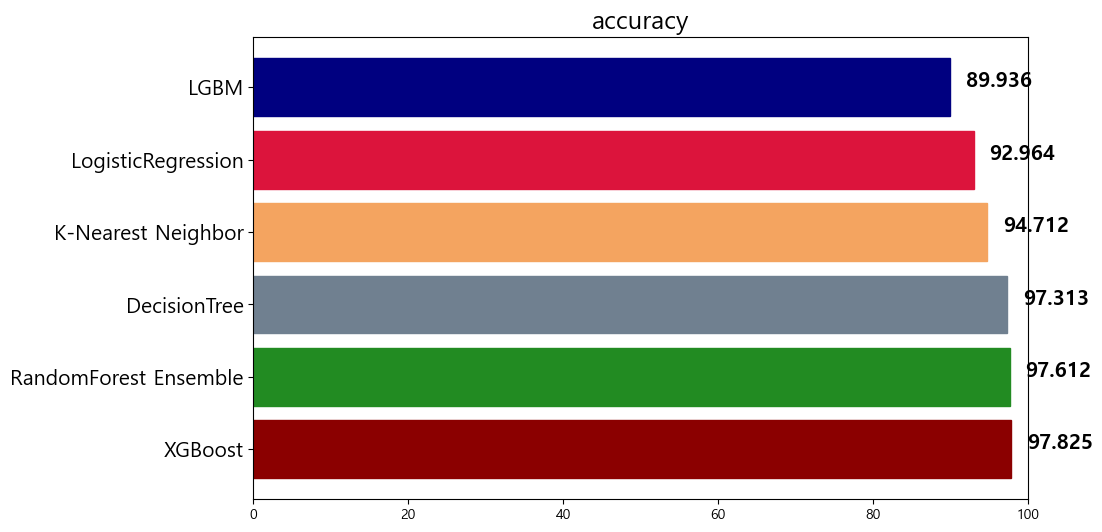

In [57]:
accuracy_eval('LGBM', lgbm_pred, y_test)

In [ ]:
7) Stacking
개별 모델이 예측한 데이터를 기반으로 final_estimator 종합하여 예측을 수행합니다.

성능을 극으로 끌어올릴 때 활용하기도 합니다.
과대적합을 유발할 수 있습니다. (특히, 데이터셋이 적은 경우)

In [58]:
from sklearn.ensemble import StackingRegressor, StackingClassifier

In [59]:
stack_models = [
    ('LogisticRegression', lg), 
    ('KNN', knn), 
    ('DecisionTree', dt),
]

In [60]:
# stack_models로 선언된 모델(LogisticRegression,KNN,DecisionTree)의 예측결과를 최종 meta_model(final_estimator)을 RandomForest(rfc) 사용하여 분류 예측 
stacking = StackingClassifier(stack_models, final_estimator=rfc, n_jobs=-1)

In [61]:
stacking.fit(X_train, y_train)   # 1분 20초 소요

StackingClassifier(estimators=[('LogisticRegression',
                                LogisticRegression(max_iter=2000)),
                               ('KNN', KNeighborsClassifier()),
                               ('DecisionTree',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42))],
                   final_estimator=RandomForestClassifier(n_estimators=3,
                                                          random_state=42),
                   n_jobs=-1)

In [62]:
stacking_pred = stacking.predict(X_test)

                   model   accuracy
0                XGBoost  97.825160
1  RandomForest Ensemble  97.611940
2           DecisionTree  97.313433
3      Stacking Ensemble  96.247335
4     K-Nearest Neighbor  94.712154
5     LogisticRegression  92.963753
6                   LGBM  89.936034


<Figure size 1200x900 with 0 Axes>

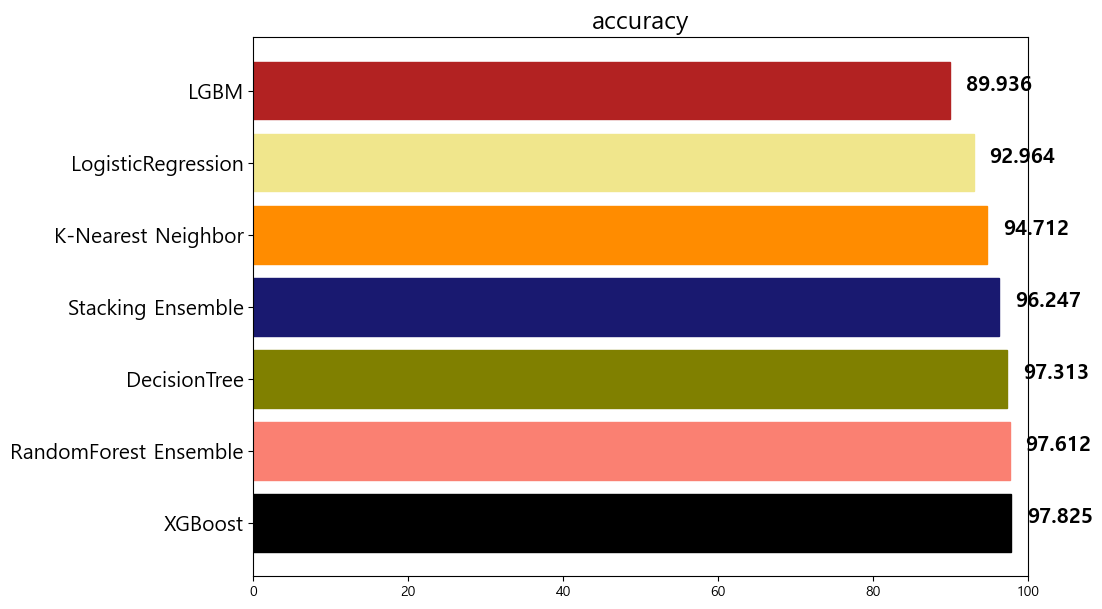

In [63]:
accuracy_eval('Stacking Ensemble', stacking_pred, y_test)

In [ ]:
8) Weighted Blending¶
각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산

모델에 대한 가중치를 조절하여, 최종 output을 산출합니다.
가중치의 합은 1.0이 되도록 합니다.

In [64]:
final_outputs = {
    'DecisionTree': dt_pred, 
    'randomforest': rfc_pred, 
    'xgb': xgb_pred, 
    'lgbm': lgbm_pred,
    'stacking': stacking_pred,
}

In [69]:
final_prediction=final_outputs['DecisionTree'] * 0.1+final_outputs['randomforest'] * 0.2+final_outputs['xgb'] * 0.25+final_outputs['lgbm'] * 0.15+final_outputs['stacking'] * 0.3

In [70]:
# 가중치 계산값이 0.5 초과하면 1, 그렇지 않으면 0
final_prediction = np.where(final_prediction > 0.5, 1, 0)

                   model   accuracy
0                XGBoost  97.825160
1      Weighted Blending  97.697228
2  RandomForest Ensemble  97.611940
3           DecisionTree  97.313433
4      Stacking Ensemble  96.247335
5     K-Nearest Neighbor  94.712154
6     LogisticRegression  92.963753
7                   LGBM  89.936034


<Figure size 1200x900 with 0 Axes>

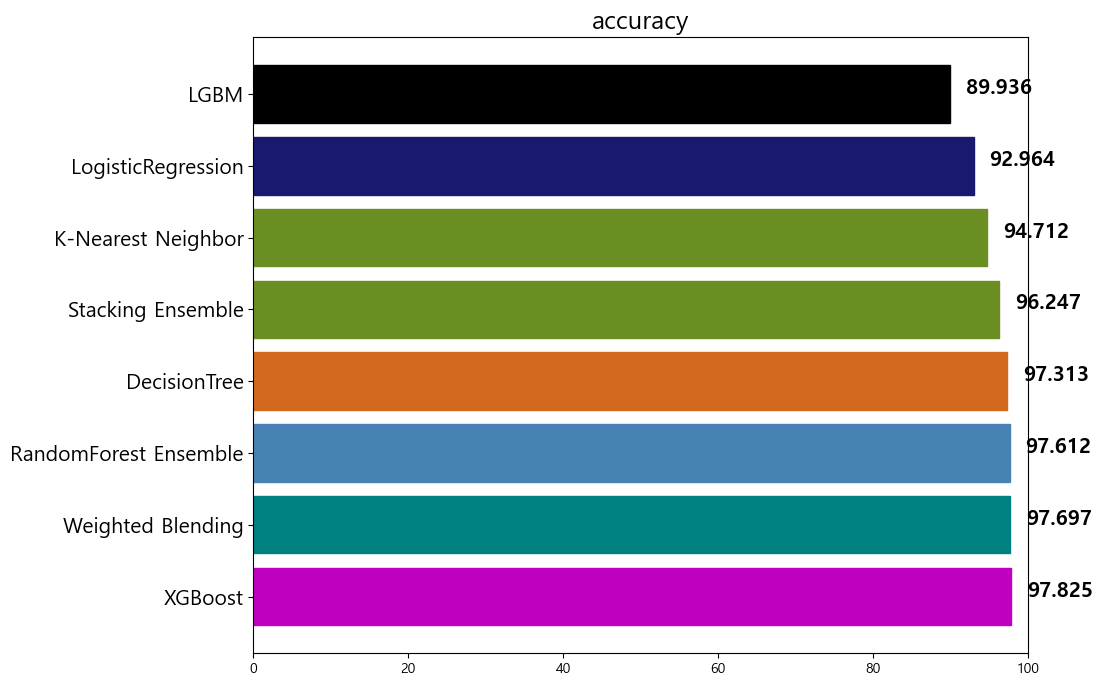

In [71]:
accuracy_eval('Weighted Blending', final_prediction, y_test)

In [ ]:
배운 내용 정리
머신러닝 모델 프로세스
① 라이브러리 임포트(import)
② 데이터 가져오기(Loading the data)
③ 탐색적 데이터 분석(Exploratory Data Analysis)
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 더미특성 생성, 특성 추출 (feature engineering) 등
⑤ Train, Test 데이터셋 분할
⑥ 데이터 정규화(Normalizing the Data)
⑦ 모델 개발(Creating the Model)
⑧ 모델 성능 평가
평가 지표 활용 : 모델별 성능 확인을 위한 함수 (가져다 쓰면 된다)
단일 회귀예측 모델 : LogisticRegression, KNN, DecisionTree
앙상블 (Ensemble) : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending